In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

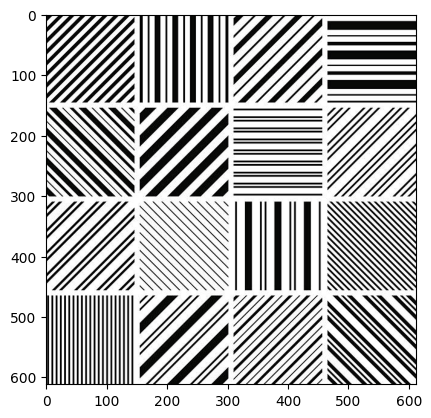

In [2]:
image = cv2.imread("./filter.jpg")

plt.imshow(image)

In [3]:
image.shape

(612, 612, 3)

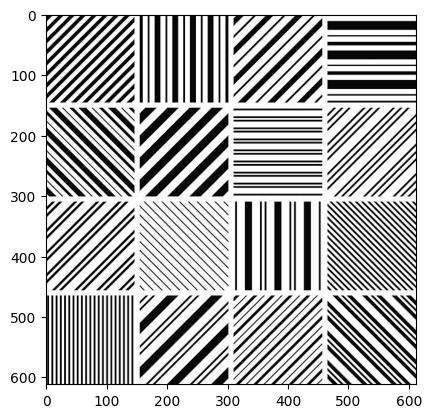

In [4]:
image = cv2.imread("./filter.jpg",cv2.IMREAD_GRAYSCALE)

plt.imshow(image,cmap='gray')

In [5]:
image.shape

(612, 612)

In [ ]:
# x should be try out in custom filters in both direction to increase the difference as sharp as it becomes

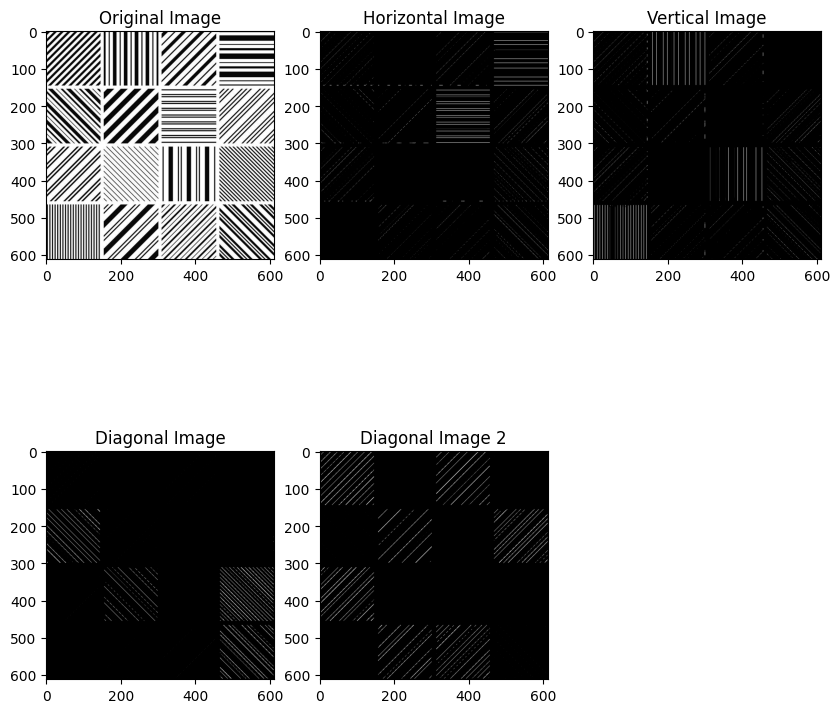

In [10]:
x = -10

horizontal_kernel = np.array([[-1, -1, -1], 
                              [x, x, x], 
                              [1, 1, 1]])

vertical_kernel = np.array([[-1, x, 1], 
                            [-1, x, 1], 
                            [-1, x, 1]])

diagonal_kernel = np.array([[x, -1, -1], 
                            [1, x, -1], 
                            [1, 1, x]])


diagonal_kernel2 = np.array([[-1, -1, x], 
                            [-1, x, 1], 
                            [x, 1, 1]])

horizontal_filtered_image = cv2.filter2D(image, -1, horizontal_kernel)
vertical_filtered_image = cv2.filter2D(image, -1, vertical_kernel)
diagonal_filtered_image = cv2.filter2D(image, -1, diagonal_kernel)
diagonal_filtered_image2 = cv2.filter2D(image, -1, diagonal_kernel2)


plt.figure(figsize=(10,10))
plt.subplot(2,3,1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(2,3,2)
plt.title("Horizontal Image")
plt.imshow(horizontal_filtered_image, cmap='gray')

plt.subplot(2,3,3)
plt.title("Vertical Image")
plt.imshow(vertical_filtered_image, cmap='gray')

plt.subplot(2,3,4)
plt.title("Diagonal Image")
plt.imshow(diagonal_filtered_image, cmap='gray')

plt.subplot(2,3,5)
plt.title("Diagonal Image 2")
plt.imshow(diagonal_filtered_image2, cmap='gray')

plt.show()


In [7]:
horizontal_filtered_image.shape

(612, 612)

In [ ]:
# In this line:


# cv2.filter2D(image, -1, kernel)
# the second parameter (here -1) is called the ddepth, which stands for "desired depth of the output image".

# 🔍 So what does ddepth = -1 mean?
# -1 tells OpenCV to automatically use the same depth (bit-type) as the input image.

# For example:

# If image is uint8 (8-bit), then output will also be uint8.

# 🧠 What is "depth" in this context?
# "Depth" is how many bits per channel the pixel values use.

# Depth Constant	Meaning
# CV_8U	8-bit unsigned integer
# CV_16S	16-bit signed integer
# CV_32F	32-bit float
# -1	Same as source image

# ✅ When would you change it from -1?
# When your kernel might produce negative or large values and you don't want them to be clipped or wrapped.

# Example: You apply a sharpening or edge-detection kernel on a uint8 image: